In [1]:
from _element import feature_control as ft_c

In [2]:
from _element import calculations as calc

In [3]:
from _usecase import algorithm_prophet as prpt

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별_반납회수(13_17)_withobject.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)

In [9]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [10]:
y_col= df_raw.columns.values.tolist()

In [11]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [12]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [13]:
x_col= df_temp.columns.values.tolist()

In [14]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [15]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [16]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [18]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [19]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별_반납회수(13_17)_withobject.xlsx
RMSE with segment 1041: 1252.45375816
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 59.9682912018
MAPE_div_std with segment 1041: 64.9802922343
sMAPE of company code 1041: 11.2789664796
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-20       3.7      -4.0          0.2  4726.900479  5619
1 2017-11-21       6.8       0.4          0.5  5352.117154  6057
2 2017-11-22       9.5      -0.8          0.0  5489.257834  5674
3 2017-11-23       4.3      -0.6          0.8  5659.477762  5686
4 2017-11-24       2.9      -2.5          0.1  5803.627962  6261


RMSE with segment 1692: 4480.49902266
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 25.1302909618
MAPE_div_std with segment 1692: 100.889131981
sMAPE of company code 1692: 14.2357964161
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-20       3.7      -4.0          0.2  14742.119527  14471
1 2017-11-21       6.8       0.4      

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


RMSE with segment 1853: 2511.85216537
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 83.3952815186
MAPE_div_std with segment 1853: 61.3671674826
sMAPE of company code 1853: 19.7871411762
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-20       3.7      -4.0          0.2  5285.331578  5444
1 2017-11-21       6.8       0.4          0.5  6346.408175  5476
2 2017-11-22       9.5      -0.8          0.0  6045.425611  6080
3 2017-11-23       4.3      -0.6          0.8  5778.126631  4743
4 2017-11-24       2.9      -2.5          0.1  5198.308659  4661


RMSE with segment 1878: 1139.9610901
MAPE with segment 1878: inf
MAPE_with_std with segment 1878: 35.3392757584
MAPE_div_std with segment 1878: 60.2051319888
sMAPE of company code 1878: 7.58193925633
          ds  temp_max  temp_min  rain_amount         yhat  1878
0 2017-11-20       3.7      -4.0          0.2  5019.548022  5647
1 2017-11-21       6.8       0.4          0.5  5450.997437  6246
2 2017-11-22

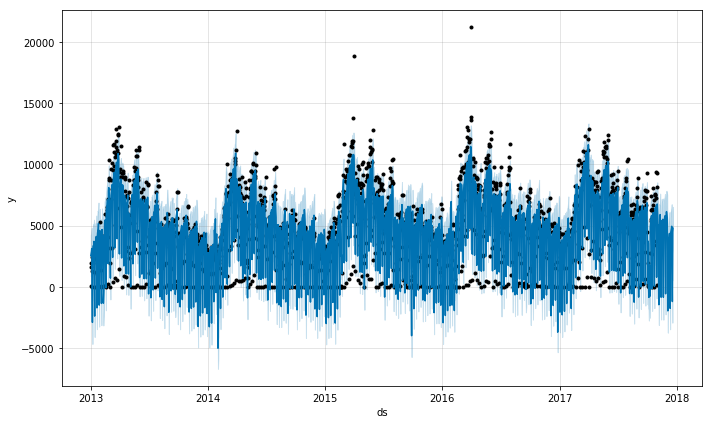

In [20]:
result_dict[1041]['model'].plot(result_dict[1041]['forecastProphetTable'])

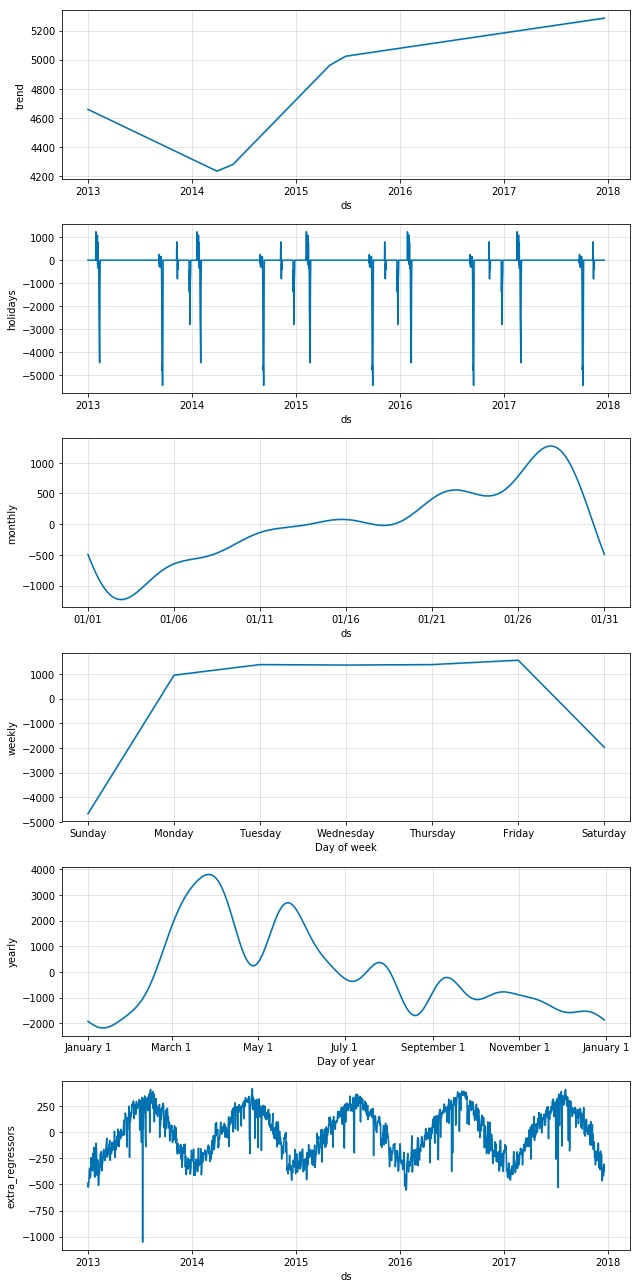

In [21]:
result_dict[1041]['model'].plot_components(result_dict[1041]['forecastProphetTable'])

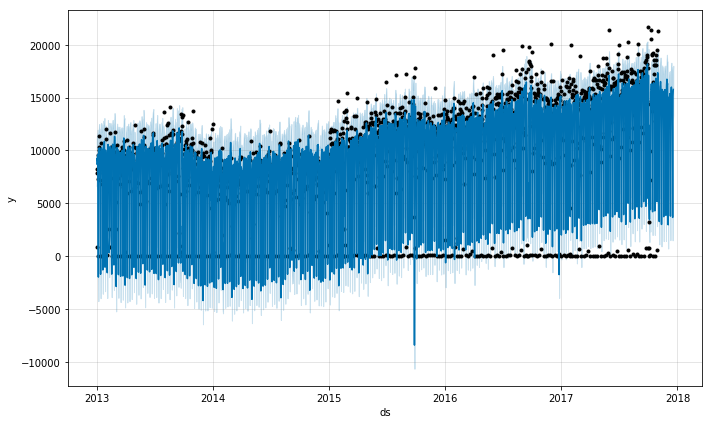

In [22]:
result_dict[1692]['model'].plot(result_dict[1692]['forecastProphetTable'])

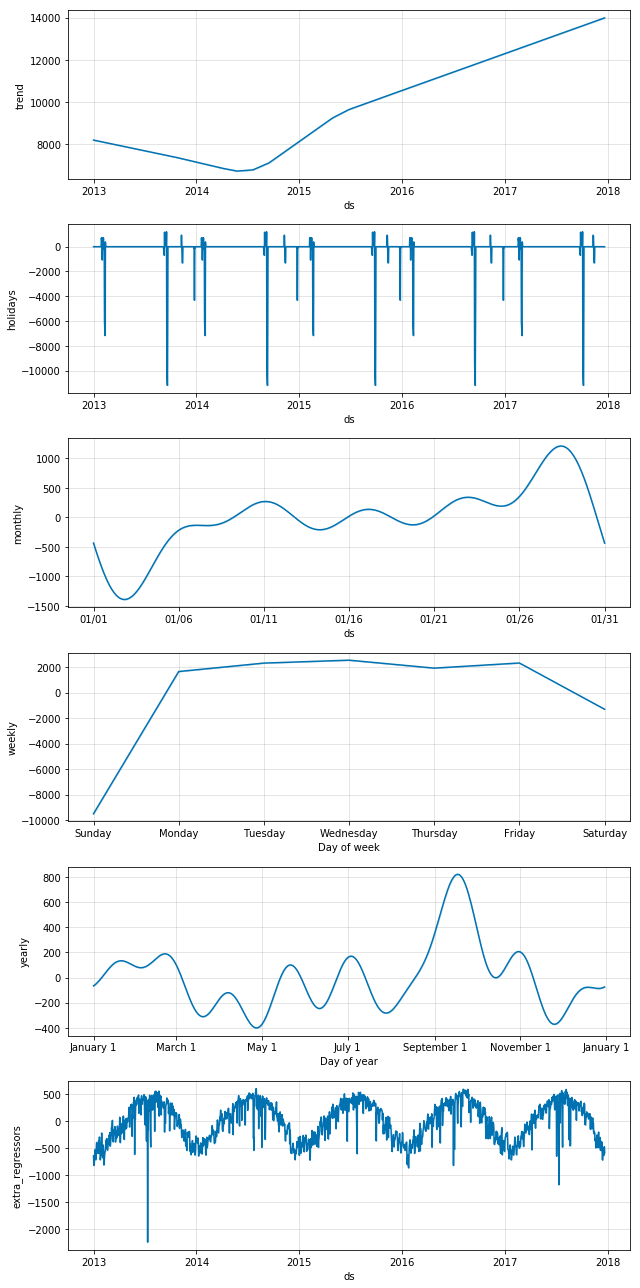

In [23]:
result_dict[1692]['model'].plot_components(result_dict[1692]['forecastProphetTable'])

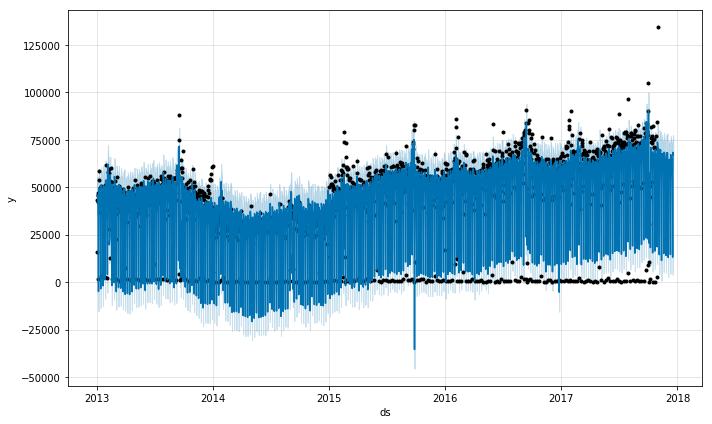

In [24]:
result_dict[1815]['model'].plot(result_dict[1815]['forecastProphetTable'])

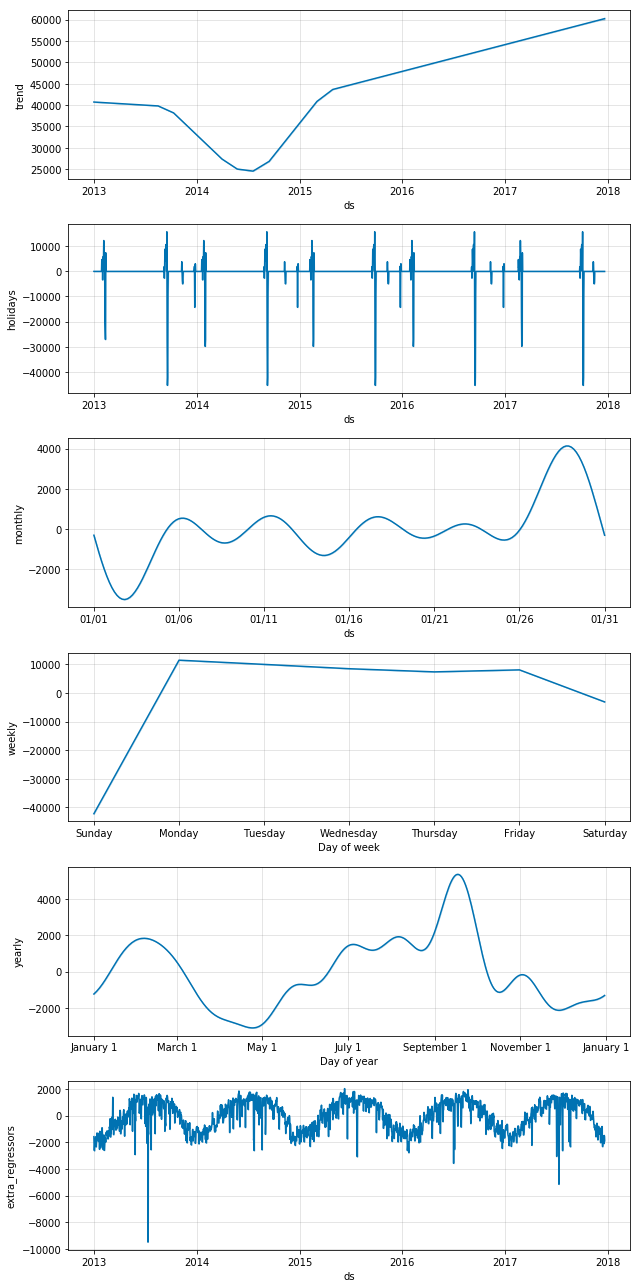

In [25]:
result_dict[1815]['model'].plot_components(result_dict[1815]['forecastProphetTable'])

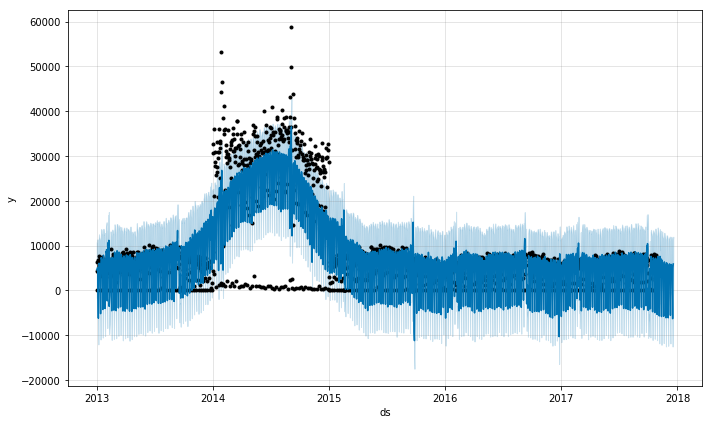

In [26]:
result_dict[1853]['model'].plot(result_dict[1853]['forecastProphetTable'])

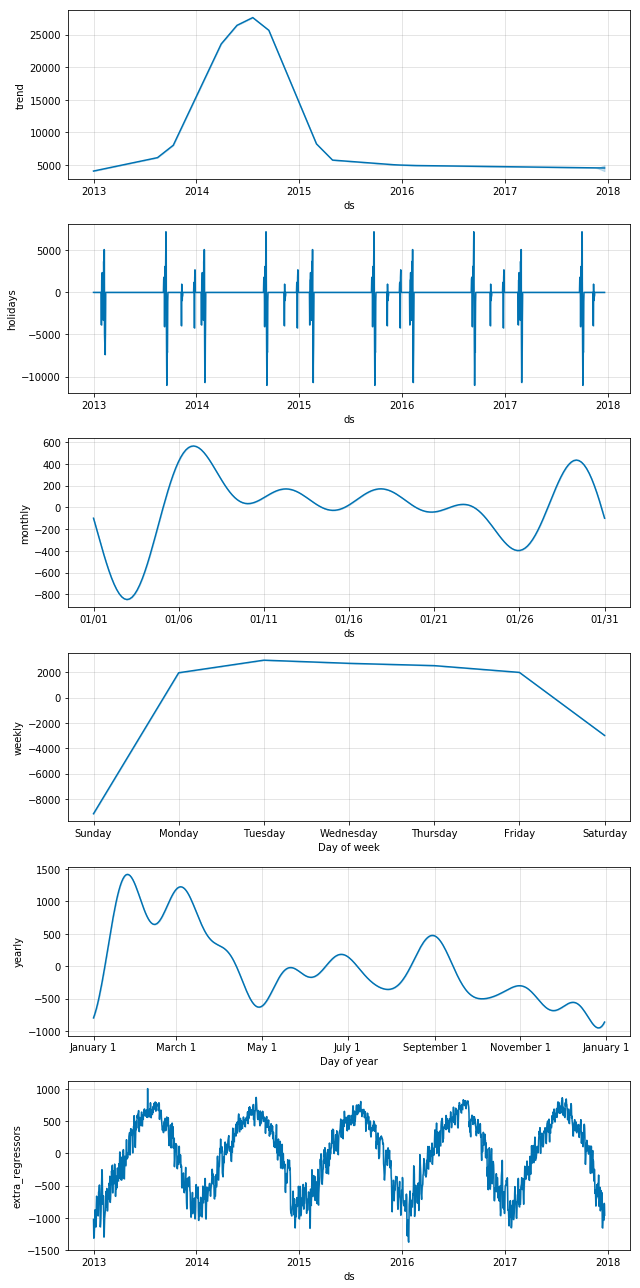

In [27]:
result_dict[1853]['model'].plot_components(result_dict[1853]['forecastProphetTable'])

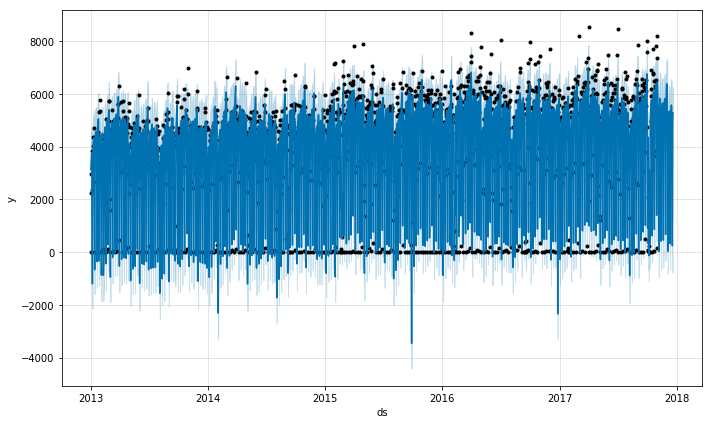

In [28]:
result_dict[1878]['model'].plot(result_dict[1878]['forecastProphetTable'])

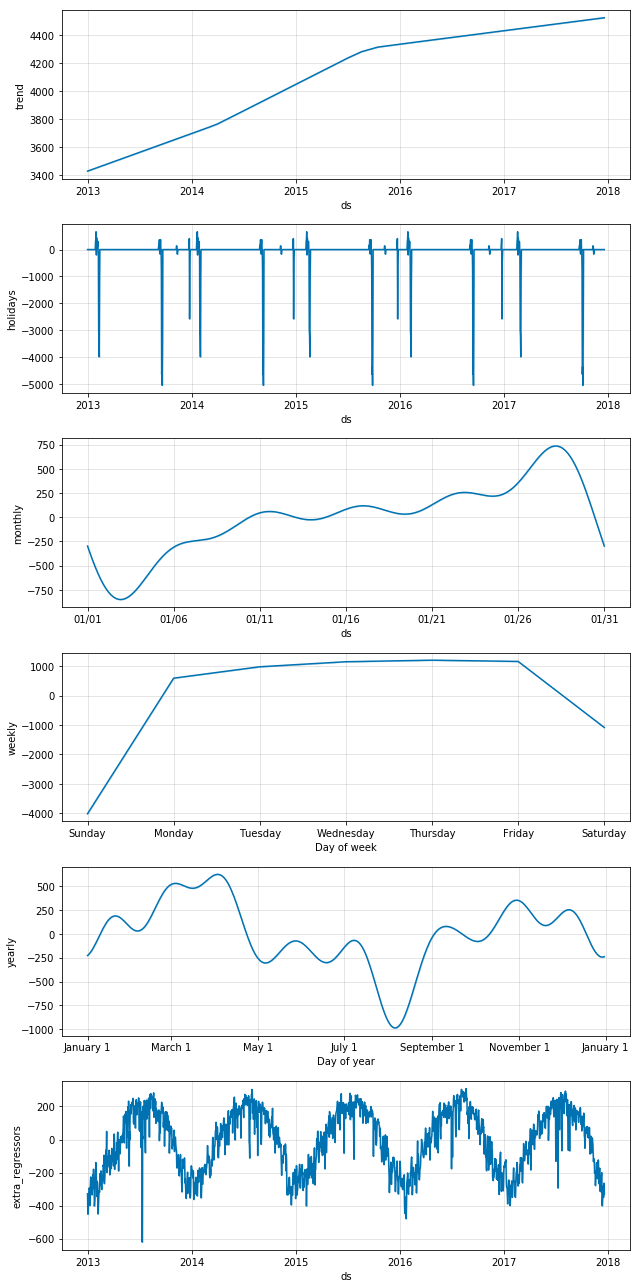

In [29]:
result_dict[1878]['model'].plot_components(result_dict[1878]['forecastProphetTable'])